In [1]:
## IMPORTS

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## IMPORT PLOTS
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../pre_processing/datasets/no_filtered_analysis.csv")

In [3]:
df.head(10)

,RA,EVADIDO,RESID_ARARAS,BOLSISTA,GRADE_CORRENTE,NOTA_MEDIA,PONTUACAO_PS,TOT_MAT_CURSADAS,TOT_APROVACOES,TOT_REPROVACOES,...,SIF029,SIF030,SIF038,SIF039,SIF070,NCS037,NCS040,SIF006,SIF072,SIF073
0,002edf3eae2ce5635d797b35345ffdea,0,1,1,2019,7.0,47.0,10,9,1,...,4,0,0,0,0,0,0,0,1,1
1,003719ff8ca88d5266775000fbd3c7f9,1,0,1,2016,5.5,47.0,18,15,3,...,0,0,0,0,0,0,0,1,0,0
2,01563df7114a12af3f8cbd0cb4082491,1,0,0,2014,3.0,46.0,12,6,6,...,0,0,0,0,0,0,0,4,0,0
3,016ed164e805bc35f38559a5de19f818,1,0,1,2014,5.1,47.0,49,37,12,...,1,1,5,4,1,1,1,1,0,0
4,017a04be49784c0140a9506efe4aea86,0,0,1,2019,5.4,30.0,10,8,2,...,0,0,0,0,0,0,0,0,2,1
5,01e8f44367f1a7c965985adbfa881081,1,1,1,2019,6.4,68.0,5,4,1,...,0,0,0,0,0,0,0,0,0,0
6,020d6f2880aa06a3eb8de00be3f6d2d2,1,1,1,2016,2.2,40.0,6,1,5,...,0,0,0,0,0,0,0,0,0,0
7,0233406e951728976666df486dbdffc1,1,0,1,2017,6.3,47.0,16,14,2,...,0,0,0,0,0,0,0,1,0,0
8,02504e5e77b7f44710c9fd0be8a17cfc,1,1,1,2014,6.4,45.3,12,10,2,...,0,0,0,0,0,0,0,1,0,0
9,0275dc930c1d73a0b6a220d44b264e40,0,0,1,2016,6.2,47.0,48,46,2,...,1,1,1,1,1,1,1,1,0,0


In [4]:
# Dropo a coluna de RA
df.drop("RA", axis=1, inplace=True)

In [5]:
## Separando base de treino e teste

X = df.iloc[:, df.columns != "EVADIDO"]
y = df["EVADIDO"]
# y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [6]:
metricas = {'REC':'recall', 
            'AUC':'roc_auc', 
            'Accuracy': 'accuracy'}

In [7]:
## Parametros para o Grid Search
parametros = {
'kernel': ['linear','rbf', 'sigmoid'], 
'C': [0.3,0.5,1,2,3,10],
'gamma': [0.3,0.5,1],
'decision_function_shape':['ovo', 'ovr'],
'shrinking': [True, False]
}

In [8]:
print(y_test.value_counts())
print(y_train.value_counts())

0    100
1     67
Name: EVADIDO, dtype: int64
0    203
1    134
Name: EVADIDO, dtype: int64


In [9]:
model = GridSearchCV(
        SVC(), parametros, scoring=metricas, refit='Accuracy'
    )

In [10]:
model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.3, 0.5, 1, 2, 3, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [0.3, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'shrinking': [True, False]},
             refit='Accuracy',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'REC': 'recall'})

In [11]:
model.score(X_train, y_train)

0.9554896142433235

In [12]:
## Melhor configuração
print(model.best_params_)

{'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 0.3, 'kernel': 'linear', 'shrinking': True}


In [13]:
##Realizando as predições com os melhores parametros encontrados
predictions = model.best_estimator_.predict(X_test)

In [14]:
## Scores
print("Accuracy: ", metrics.accuracy_score(y_test, predictions))
print("Precision: ", metrics.precision_score(y_test, predictions))
print("Recall: ", metrics.recall_score(y_test, predictions))
print("ROC: ", metrics.roc_auc_score(y_test, predictions))

Accuracy:  0.9161676646706587
Precision:  0.9344262295081968
Recall:  0.8507462686567164
ROC:  0.9053731343283582


In [15]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, predictions))

[[96  4]
 [10 57]]


In [16]:
# Classification Reports
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       100
           1       0.93      0.85      0.89        67

    accuracy                           0.92       167
   macro avg       0.92      0.91      0.91       167
weighted avg       0.92      0.92      0.92       167



In [17]:
############### PLOTS ####################

In [18]:
# NOTA_MEDIA e TOTAL_REPROVAÇÔES

X_plot = df[['NOTA_MEDIA', 'TOT_REPROVACOES']]
y_plot = y #EVADIDO

In [19]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [20]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [21]:
model = SVC(kernel='linear', C = 0.3, gamma=0.5, decision_function_shape='ovo')

In [22]:
clf = model.fit(X_plot, y_plot)
model.score(X_plot, y_plot)

0.7420634920634921

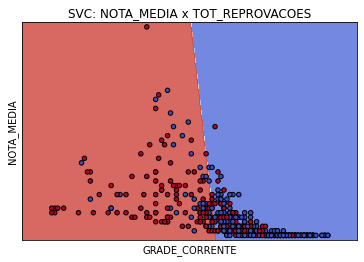

In [23]:
fig, ax = plt.subplots()

# title for the plots
title = 'SVC: NOTA_MEDIA x TOT_REPROVACOES'
# Set-up grid for plotting.
X0, X1 = X_plot.iloc[:,0], X_plot.iloc[:,1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_ylabel("NOTA_MEDIA")
ax.set_xlabel("GRADE_CORRENTE")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()